(1460,)


<Figure size 432x288 with 0 Axes>

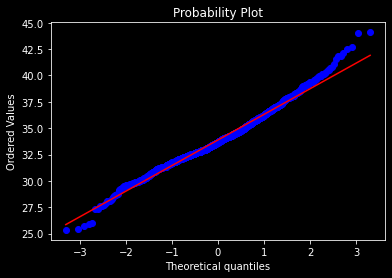

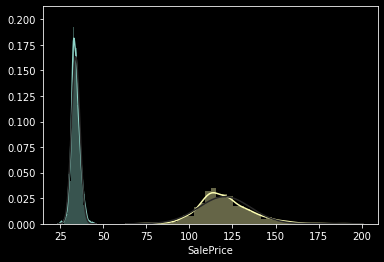

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

train = pd.read_csv("house-prices-raw/train.csv")
#sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
#res = stats.probplot(train['SalePrice'], plot=plt)
fig = plt.figure()
train_log=np.log(train['SalePrice'])
#res = stats.probplot(train_log, plot=plt)
fig = plt.figure()
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
             #loc='best')
#plt.ylabel('Frequency')
#plt.title('SalePrice distribution')
#fig = plt.figure()
#y_Stad=(train['SalePrice']-mu)/sigma
#res = stats.probplot(y_Stad, plot=plt)
#fig = plt.figure()
#sns.distplot(train['SalePrice'] , fit=norm)
lam = 0.15
Y_norm = boxcox1p(train['SalePrice'], lam)
res = stats.probplot(Y_norm, plot=plt)
fig=plt.figure()
sns.distplot(Y_norm , fit=norm)
lam = 0.30
Y_norm = boxcox1p(train['SalePrice'], lam)
sns.distplot(Y_norm , fit=norm)
#res = stats.probplot(Y_norm, plot=plt)
fig=plt.figure()
lam = 0.25
Y_norm = boxcox1p(train['SalePrice'], lam)
#res = stats.probplot(Y_norm, plot=plt)
fig=plt.figure()
#print(Y_norm.shape)
#plt.show()
Y = preprocessing.normalize(train['SalePrice'].values.reshape((-1,1)))
print(Y.reshape(-1,).shape)
Y=Y+0.0000001*np.random.rand(train['SalePrice'].shape[0], 2)
#sns.distplot(Y.reshape(-1,) , fit=norm)
#res = stats.probplot(train['SalePrice'], plot=plt)
#fig = plt.figure()
#res = stats.probplot(Y, plot=plt)
#sns.kdeplot(train['SalePrice'])

In [69]:
train.shape

(1460, 81)

In [79]:
Y=train['SalePrice']
Y.shape
Y.values.reshape(train['SalePrice'].shape[0],1).shape

(1460, 1)

In [72]:
a=np.random.randn(5)
a.shape
a.reshape(5,1).shape
train['SalePrice'].shape[0]

1460

-0.07692391328663316
-0.008644001143304075
2 0.5304845381940009
[-0.00864478]


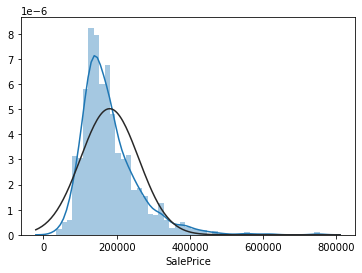

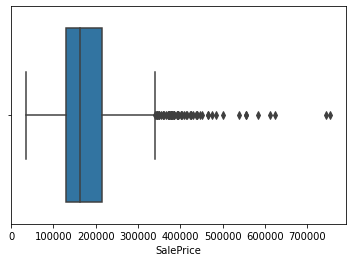

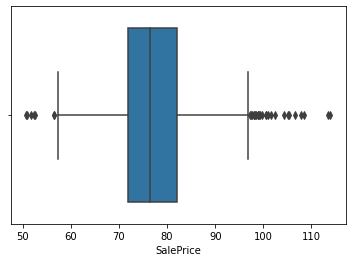

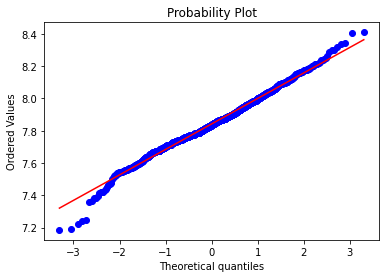

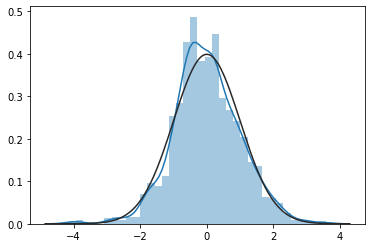

In [158]:
#numeric_feats = train['SalePrice'].index
#skew= train[80].apply(lambda x: skew(x.dropna()))
#print(numeric_feats)
sns.distplot(train['SalePrice'] , fit=norm)
fig = plt.figure()
sns.boxplot(train['SalePrice'])
fig = plt.figure()
xt, m = stats.boxcox(train['SalePrice'])
print(m)
print(skew(xt))
lmd = m
Y=boxcox1p(train['SalePrice'],lmd)
print("2" ,skew(Y))
sns.boxplot(Y)
fig = plt.figure()
res = stats.probplot(xt, plot=plt)
#res = stats.probplot(train['SalePrice'])
fig = plt.figure()
pt = PowerTransformer()
Y_t=pt.fit_transform(train['SalePrice'].values.reshape(-1,1))
print(skew(Y_t))
sns.distplot(Y_t , fit=norm)





In [85]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
train = pd.read_csv("house-prices-raw/train.csv")
train['LotShape'].isnull
print(len(train['LotShape'].unique()))
lbl = LabelEncoder() 
lbl.fit(list(train['LotShape'].values)) 
X_labelencoded = lbl.transform(list(train['LotShape'].values))
print(train)
X_labelencoded=pd.get_dummies(X_labelencoded, prefix="LotShape")
print(X_labelencoded)
print(X_labelencoded.shape)
train=train.join(X_labelencoded)
train=train.drop(['LotShape'], axis=1)
print(train.shape)
#onehot_encoder = OneHotEncoder(sparse=False)
#onehot_encoded = onehot_encoder.fit_transform(X_labelencoded.reshape(-1,1))
#print(onehot_encoded[0])
#columnTransformer = ColumnTransformer([('encoder', 
                                       # OneHotEncoder(),[6])], 
                                      #remainder='passthrough') 
  
#data = np.array(columnTransformer.fit_transform(train), dtype = np.str)
#print(data)

4
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  

In [60]:
train=pd.get_dummies(train)
train.columns
print(train['OverallCond'])

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
